In [ ]:
Simulation FIR

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

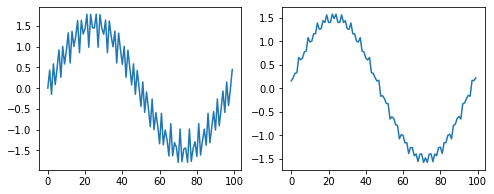

In [2]:
freq = np.linspace(10, 1000000, 40)                                    # a list of different frequencies between 0 Hz and 1MHz
time = np.linspace(0, 10, 4000000)                                     # a list of time instants

signals = np.array([np.sin(time*freq[i]) for i in range(len(freq))])   # this list contains 40 sinusoidal signals with different frequencies
out = np.zeros((40,50000))                                             # initialization of the output


cutoff = 0.01                                                           # filter parameter
weights = firwin(4, cutoff, pass_zero = 'lowpass')




#FIR filter
for i in range(len(signals)):                                          # FILTER module: for every signal
  for k in range(50000):                                                 
       data = signals[i][k:k+4]                                        # take four consecutive elements 
       o_data = data*weights                                           # multiply them by the weights
       out[i][k] = sum(o_data)                                         # then sum the result



input_wave = (1.5*signals[1]+0.1*signals[21]+0.4*signals[39])          # a superposition of waves as input
output_wave = np.zeros(50000)                                          # initialization of the output

for k in range(50000):                                                 
       data = input_wave[k:k+4]                                        # take four consecutive elements 
       o_data = data*weights                                           # multiply them by the weights
       output_wave[k] = sum(o_data)   

fig, ([i_ax, o_ax]) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))   

i_ax.plot(input_wave[0:100])
o_ax.plot(output_wave[0:100])